In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
X = df.iloc[:,:4]
y = df.iloc[:,4:]

In [8]:
X.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

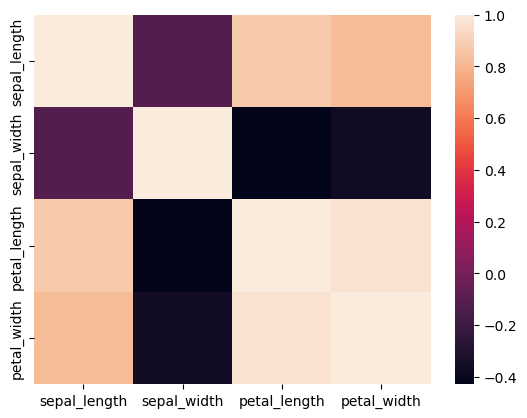

In [9]:
sns.heatmap(X.corr())

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [11]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [12]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty' : ['l1','l2','elasticnet'], 
             'C':[10,20,30,40,50], 
             'max_iter':[100,200,300]}

In [13]:
classifier_regressor = GridSearchCV(classifier, 
                                    param_grid = parameter, 
                                    scoring = 'accuracy', 
                                    cv = 5)

In [14]:
classifier_regressor.fit(X_train, y_train)

C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [10, 20, 30, 40, 50], 'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [15]:
classifier_regressor.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [10, 20, 30, 40, 50], 'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')>

In [16]:
classifier_regressor.best_params_

{'C': 50, 'max_iter': 200, 'penalty': 'l2'}

In [17]:
classifier_regressor.best_score_

0.9700000000000001

In [18]:
y_pred = classifier_regressor.predict(X_test)

In [19]:
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica', 'virginica', 'virginica',
       'virginica'], dtype=object)

In [20]:
from sklearn.metrics import accuracy_score, classification_report
print('The accuracy score is ', accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

The accuracy score is  0.98
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.95      1.00      0.97        18
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [23]:
import warnings
warnings.filterwarnings('ignore')

# sepal_length, sepal_width, petal_length, petal_width
# result = classifier_regressor.predict([[4,2,1,0]]) #setosa
# result = classifier_regressor.predict([[5.8,3,4.3,1.3]]) #versicolor
result = classifier_regressor.predict([[8,4,7,3]]) #virginica

if result == 'setosa':
    print('setosa')
elif result == 'versicolor':
    print('versicolor')
elif result == 'virginica':
    print('virginica')
else:
    print('not found')

virginica
